<a href="https://colab.research.google.com/github/tugcegulsanusta/machine-learning-project/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Explore data



In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head()


In [ ]:
#count NaN
df.isna().sum()

# Clear data

In [ ]:
df = df.dropna(axis = 1)
df = df.drop('id', axis= 1)
df.shape
df.head()

In [ ]:
#count the class results
df['diagnosis'].value_counts()


In [ ]:
#replace data M -> 1, B -> 0
df['diagnosis'] = df['diagnosis'].replace(['M'], '1')
df['diagnosis'] = df['diagnosis'].replace(['B'], '0')
df['diagnosis'] = df['diagnosis'].astype('int')

df.info()

In [ ]:
#drop the diagnosis(Diagnosis is our class label and store it in  'y')
y = df.diagnosis
X = df.drop('diagnosis', axis = 1)
X.head()

# Explore relations

In [ ]:
#first 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((X- X.mean())/X.std()).iloc[:,0:15]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data= data)
plt.xticks(rotation=90)


In [ ]:
#last 15 columns boxplot
plt.figure(figsize=(20,10))
data = pd.concat([y, ((X-X.mean())/X.std()).iloc[:,15:31]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='attributes', value_name='values')

sns.boxplot(x='attributes', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

In [ ]:
#find correlation between diagnosis and attributes
df.corr()['diagnosis'].sort_values()

In [ ]:
#find correlation between attributes
#correlation heatmap
plt.figure(figsize = (40,40))
sns.heatmap(df.iloc[:, 1:31].corr(), annot = True, linewidths = 1, cmap='Blues')

In [12]:
#drop correlated columns

x_v1 = X.drop(['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst','texture_worst', 'concavity_mean','perimeter_se', 'area_se', 'concave points_worst' ], axis= 1)

x_v1.shape

(569, 20)

<Axes: >

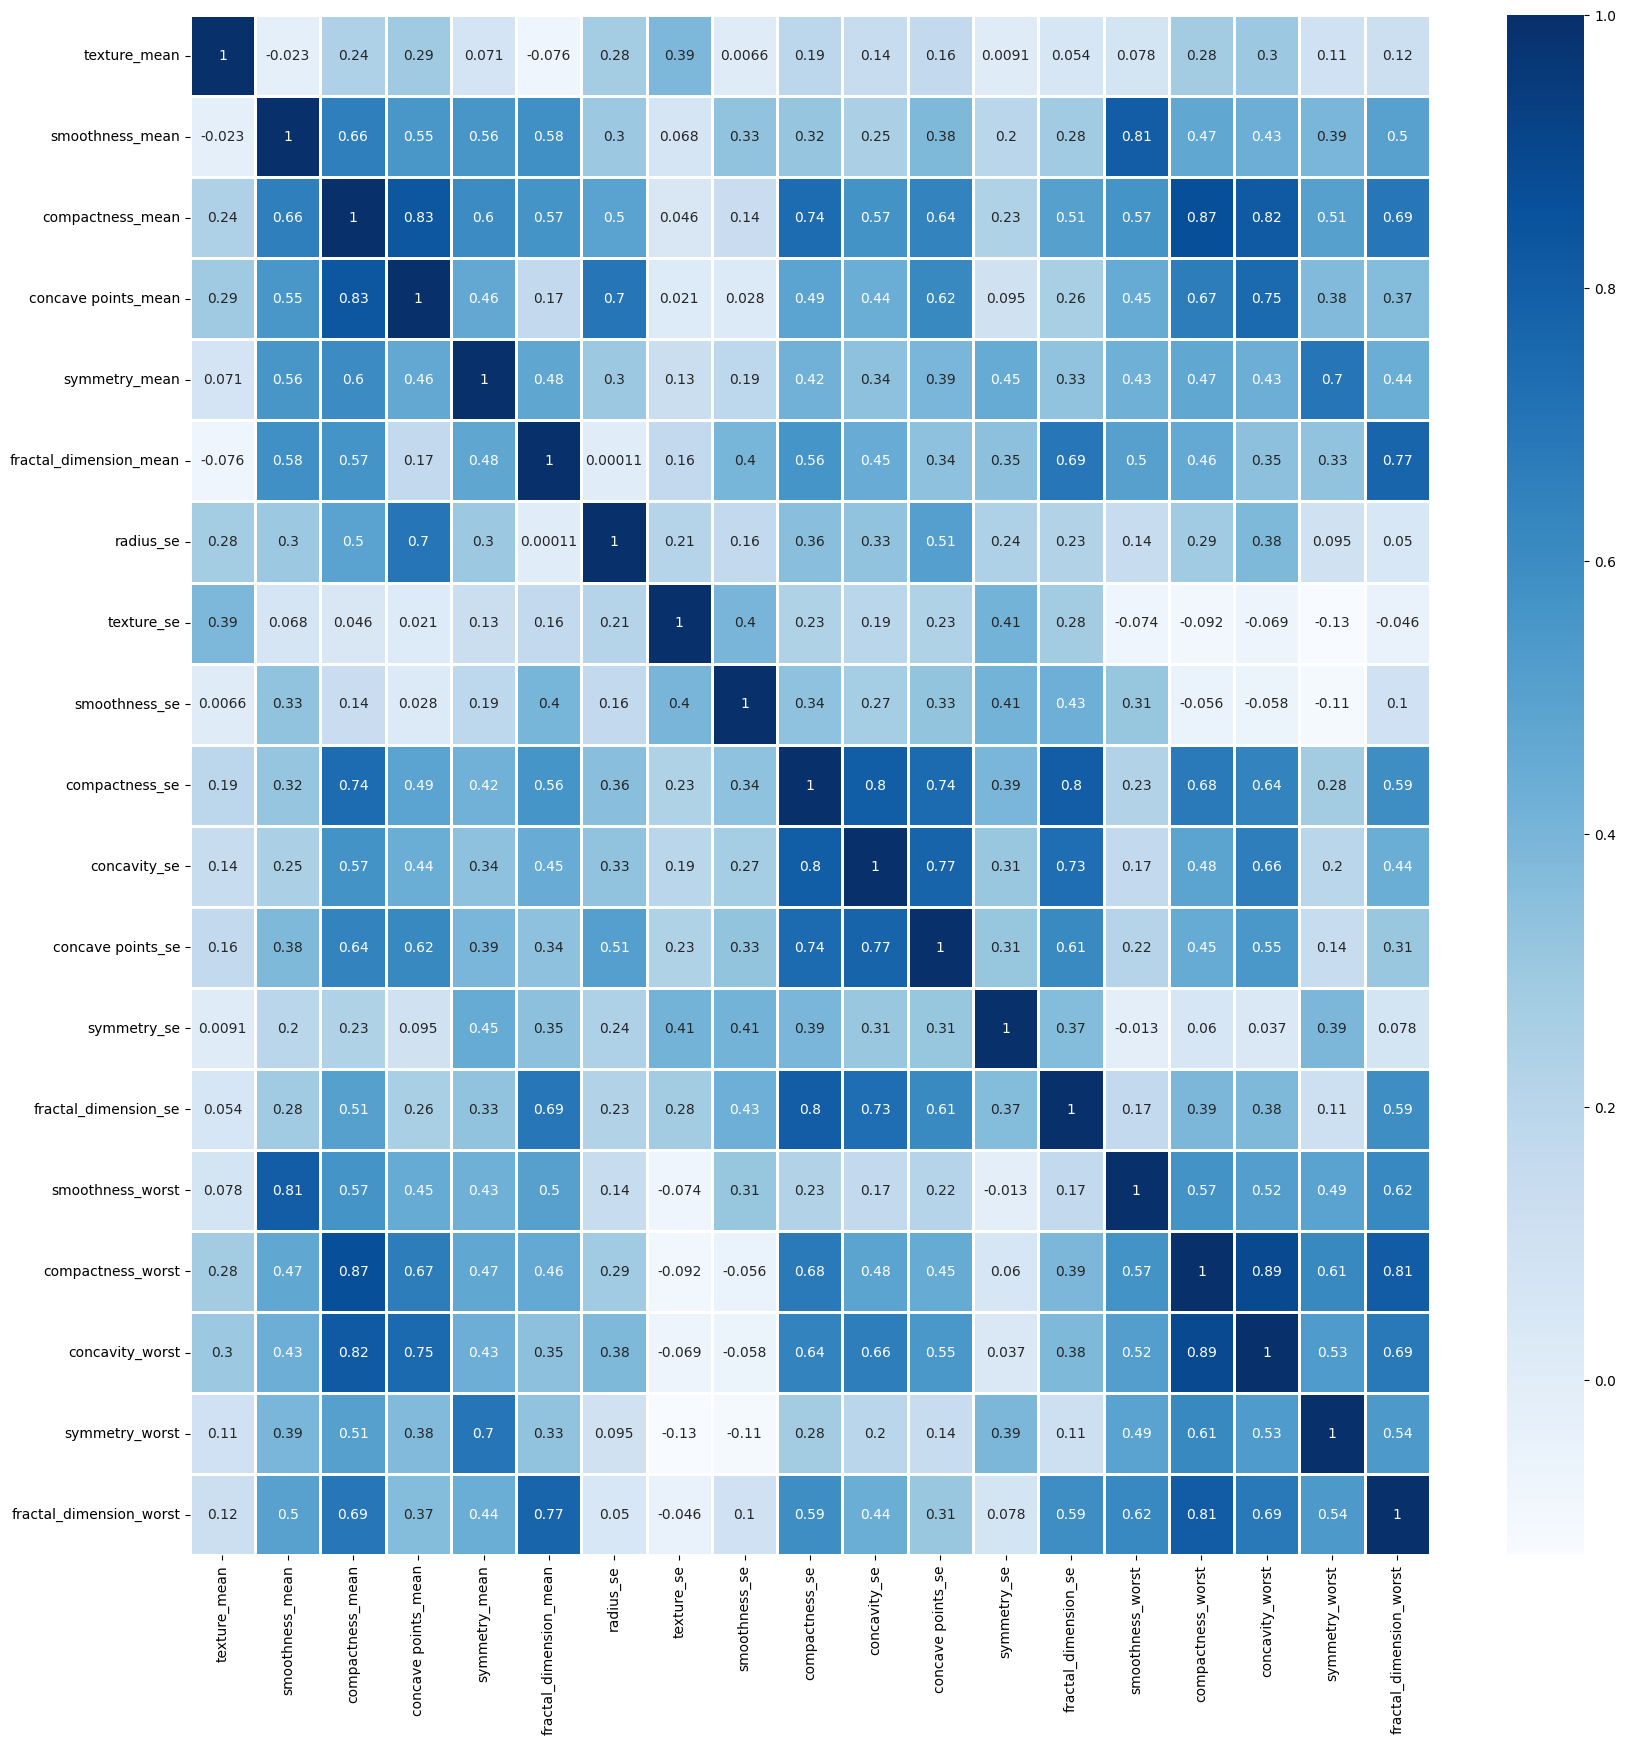

In [41]:
plt.figure(figsize = (20,20))
sns.heatmap(x_v1.iloc[:, 1:21].corr(), annot = True, linewidths = 1, cmap= 'Blues')

In [ ]:
#drop 0.80 korrelated and above
x_v2 = x_v1.drop(['compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean'], axis= 1)

x_v2.shape
x_v2.info()

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(x_v2.iloc[:, 1:15].corr(), annot = True, linewidths = 1, cmap= 'Blues')

#Test w DecisionTree

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
feature_cols1= ['radius_mean','texture_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se', 'concave points_se','symmetry_se','smoothness_worst','compactness_worst','symmetry_worst','compactness_mean','concavity_worst','fractal_dimension_worst', 'concavity_se', 'fractal_dimension_se', 'smoothness_mean']
feature_cols2 = ['radius_mean','texture_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','smoothness_se','compactness_se', 'concave points_se','symmetry_se','smoothness_worst','compactness_worst','symmetry_worst']
X1= df[feature_cols1]
X2= df[feature_cols2]
y = df.diagnosis
print(y)

Scores for first data: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.89      0.74      0.81        42

    accuracy                           0.87       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.87      0.87      0.87       114

Accuracy:  0.868421052631579


Text(0.5, 1.0, 'Confusion Matrix for first data')

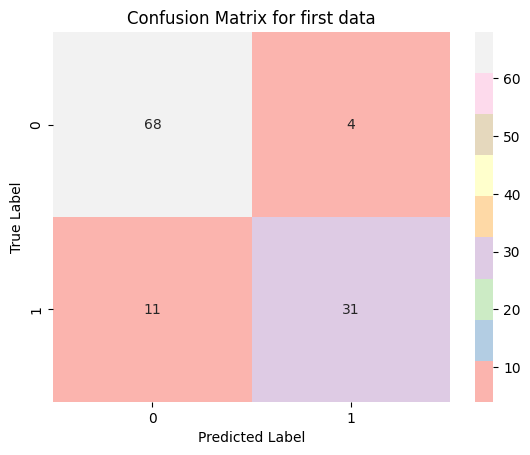

In [46]:
#split first data
X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size= 0.2, random_state = 1)

clf1= DecisionTreeClassifier(criterion = "entropy", max_depth=6)
clf1= clf1.fit(X_train, y_train)
y_predict= clf1.predict(X_test)
accuracy1 = metrics.accuracy_score(y_test, y_predict)
report1 = classification_report(y_test, y_predict)
print("Scores for first data: \n" , report1)


print('Accuracy: ', accuracy1)
confusion_m1 = confusion_matrix(y_test, y_predict)
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Pastel1", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for first data")

In [ ]:
#split second data
X_train, X_test, y_train, y_test= train_test_split(X2, y, test_size= 0.2, random_state = 1)
#Decission Tree Classifier
clf2 = DecisionTreeClassifier(criterion= "entropy", max_depth=6)

clf2= clf2.fit(X_train, y_train)
y_predict= clf2.predict(X_test)
accuracy2 = metrics.accuracy_score(y_test, y_predict)

report2 = classification_report(y_test, y_predict)
print("Scores for second data: \n" , report2)

print('Accuracy: ', accuracy2)
confusion_m2 = confusion_matrix(y_test, clf2.predict(X_test))
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Pastel1", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for second data")

In [ ]:
#visualize first desicion tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols1, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())


In [ ]:
#visualize second decision tree

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols2, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer.png')
Image(graph.create_png())

# Test w Logistic Regression

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler=StandardScaler()


Scores for first data: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy:  0.9736842105263158


Text(0.5, 1.0, 'Confusion Matrix for first data')

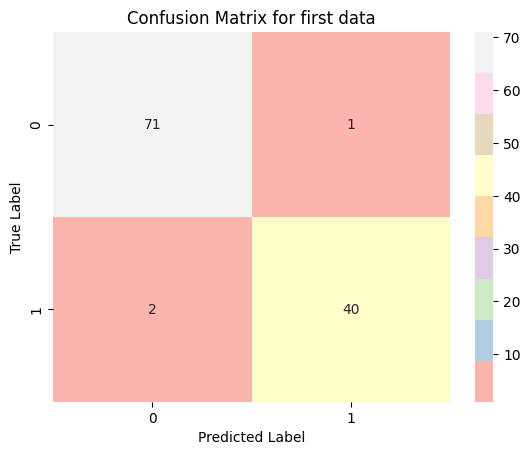

In [78]:
X_train, X_test, y_train, y_test= train_test_split(X1, y, test_size= 0.2, random_state = 1)
lr1= LogisticRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr1.fit(X_train, y_train)
y_predict = lr1.predict(X_test)

accuracy1 = accuracy_score(y_test, y_predict)
report1 = classification_report(y_test, y_predict)
print("Scores for first data: \n" , report1)


print('Accuracy: ', accuracy1)
confusion_m1 = confusion_matrix(y_test, y_predict)
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Pastel1", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for first data")

Scores for second data: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Accuracy:  0.9649122807017544


Text(0.5, 1.0, 'Confusion Matrix for second data')

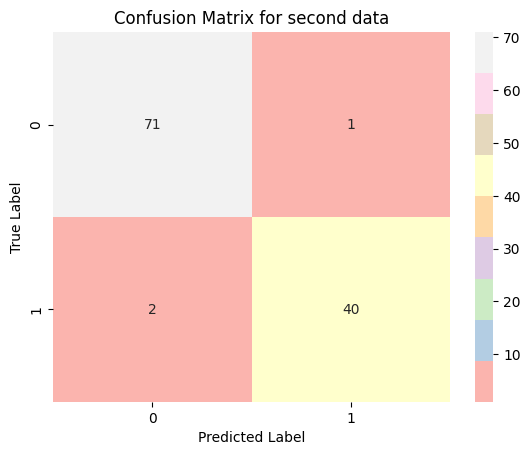

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X2, y, test_size= 0.2, random_state = 42)
lr2= LogisticRegression()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr2.fit(X_train, y_train)
y_predict = lr2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_predict)
report2 = classification_report(y_test, y_predict)
print("Scores for second data: \n" , report2)


print('Accuracy: ', accuracy2)
confusion_m2 = confusion_matrix(y_test, y_predict)
p1 = sns.heatmap(pd.DataFrame(confusion_m1), annot=True, cmap="Pastel1", fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for second data")